# Introduction to models

Based on [this notebook](https://pyro.ai/examples/intro_part_i.html)

In [8]:
import torch
import pyro

pyro.set_rng_seed(101)

In [9]:

loc = 0.   # mean zero
scale = 1. # unit variance
normal = torch.distributions.Normal(loc, scale) # create a normal distribution object
x = normal.rsample() # draw a sample from N(0,1)
print("sample", x)
print("log prob", normal.log_prob(x)) # score the sample from N(0,1)

sample tensor(-1.3905)
log prob tensor(-1.8857)


## A Simple Model

In [10]:
def weather():
    cloudy = torch.distributions.Bernoulli(0.3).sample()
    cloudy = 'cloudy' if cloudy.item() == 1.0 else 'sunny'
    mean_temp = {'cloudy': 55.0, 'sunny': 75.0}[cloudy]
    scale_temp = {'cloudy': 10.0, 'sunny': 15.0}[cloudy]
    temp = torch.distributions.Normal(mean_temp, scale_temp).rsample()
    return cloudy, temp.item()

In [13]:
weather()

('sunny', 91.11004638671875)

## Converting to Pyro Program

We use `pyro.sample`. Note this is a NAMED sample

In [19]:
x = pyro.sample("my_sample", pyro.distributions.Normal(loc, scale))
print(x)


tensor(0.3373)


In [44]:
def weather():
    cloudy = pyro.sample("cloudy", pyro.distributions.Bernoulli(0.25))
    mean_temp = {
        .0 : 30, #not cloudy
        1.0 : 20 #cloudy
    }

    scale_temp = {
        .0: 3,
        1.0: 6
    }

    return cloudy, pyro.sample(
        "temp", 
        pyro.distributions.Normal(mean_temp[cloudy.item()], scale_temp[cloudy.item()]))

weather()

(tensor(0.), tensor(23.5477))

## Recursion


In [54]:
def ice_cream_sales():
    cloudy, temp = weather()
    expected_sales = 200. if cloudy.item() == .0 and temp > 25.0 else 50.
    ice_cream = pyro.sample('ice_cream', pyro.distributions.Normal(expected_sales, 10.0))
    return ice_cream

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

samples = [ice_cream_sales().item() for _ in range(10000)]


<module 'seaborn' from '/home/jmperez/.pyenv/versions/3.6.9/lib/python3.6/site-packages/seaborn/__init__.py'>

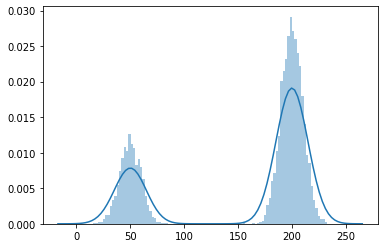

In [60]:
sns.distplot(samples, bins=100)

Another example. A geometric function

In [87]:
def geometric(p):
    num_coin = 0

    while True:
        coin = pyro.sample(
            f"x_{num_coin}",
            pyro.distributions.Bernoulli(p)
        )
        if coin.item() > .0:
            break
        else:
            num_coin += 1
    return num_coin


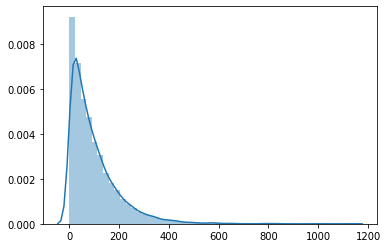

In [92]:

sns.distplot([geometric(0.01) for _ in range(10000)])